In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
import warnings
warnings.filterwarnings('ignore')
import pylab as pl

In [2]:
os.chdir("C:\\Users\\amite\\OneDrive\\Desktop\\New folder")

In [3]:
df=pd.read_csv("C:\\Users\\amite\\OneDrive\\Desktop\\New folder\\FuelConsumption.csv")

In [4]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [6]:
cdf=df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

In [7]:
cdf.isnull().sum()

ENGINESIZE              0
CYLINDERS               0
FUELCONSUMPTION_CITY    0
FUELCONSUMPTION_HWY     0
FUELCONSUMPTION_COMB    0
CO2EMISSIONS            0
dtype: int64

Text(0, 0.5, 'CO2 EMISSIONS')

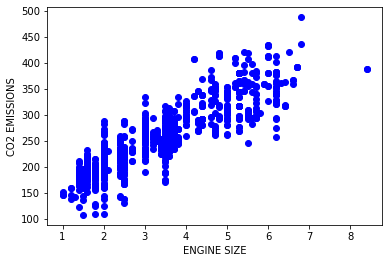

In [8]:
plt.scatter(cdf.ENGINESIZE,cdf.CO2EMISSIONS,color='blue')
plt.xlabel('ENGINE SIZE')
plt.ylabel('CO2 EMISSIONS')

In [9]:
cdf.corr()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.832225,0.778746,0.819482,0.874154
CYLINDERS,0.934011,1.000000,0.796473,0.724594,0.776788,0.849685
FUELCONSUMPTION_CITY,0.832225,0.796473,1.000000,0.965718,0.995542,0.898039
FUELCONSUMPTION_HWY,0.778746,0.724594,0.965718,1.000000,0.985804,0.861748
FUELCONSUMPTION_COMB,0.819482,0.776788,0.995542,0.985804,1.000000,0.892129
CO2EMISSIONS,0.874154,0.849685,0.898039,0.861748,0.892129,1.000000


<AxesSubplot:>

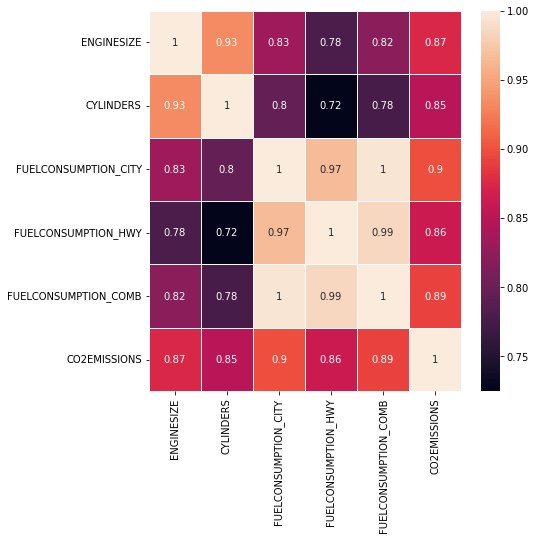

In [10]:
sns.color_palette("YlOrBr",as_cmap=True)
plt.figure(figsize=(7,7))
sns.heatmap(cdf.corr(),annot=True,yticklabels=True,linewidths=0.5)

In [11]:
X=cdf.drop(['CO2EMISSIONS'],axis=1)
y=cdf['CO2EMISSIONS']

In [12]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=1/3,random_state=0)

In [13]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [14]:
y_pred=reg.predict(X_test)
y_pred

array([334.25034894, 210.73696073, 218.197186  , 229.13534245,
       194.13210443, 298.53801518, 210.63500184, 265.29788208,
       207.90114167, 321.16726332, 282.07053405, 385.49240148,
       224.93153666, 291.79154963, 185.60117494, 279.98943172,
       353.43170289, 206.67758166, 254.48982081, 380.92023627,
       196.73630097, 228.06279924, 250.97858665, 218.95347526,
       176.68403737, 262.51936736, 268.46929248, 362.64016077,
       289.99883927, 162.67485103, 337.92937877, 224.03661979,
       287.23015522, 243.76263369, 196.73630097, 194.73325368,
       313.07389576, 214.2673672 , 224.28942454, 250.95088776,
       192.85325   , 191.13060299, 207.67805159, 186.63787034,
       311.4702608 , 200.69583444, 231.38424044, 188.11634254,
       391.416936  , 372.79523577, 321.44967352, 324.74802007,
       271.71929866, 167.01885695, 218.12282264, 188.11634254,
       295.95500088, 180.65823642, 255.33954238, 204.44933099,
       200.43248732, 208.73592922, 212.93761587, 362.64

In [15]:
from sklearn.metrics import r2_score
print("r2score",r2_score(y_test,y_pred))

r2score 0.8426468641660053
